In [150]:
# matplotlib jupyter notebook formatting
%matplotlib inline
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [106]:
# create file path variables
ride_data_to_load = 'Resources/ride_data.csv'
city_data_to_load = 'Resources/city_data.csv'

In [107]:
# Read the cities csv and store it in a pandas dataframe
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [108]:
# Read the ride data into a dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [109]:
# explore city data df
city_data_df.dtypes


city            object
driver_count     int64
type            object
dtype: object

In [110]:
# get the rows that have null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [111]:
# count the number of data points for each type of city
city_data_df.groupby(['type']).count()['city']

type
Rural       18
Suburban    36
Urban       66
Name: city, dtype: int64

In [112]:
# null values for ride data df
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [113]:
# check ride_data_df dtypes
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [114]:
# merge the dataframes
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=['city'], how='left')
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [115]:
# create dataframes for each type of city
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']

In [116]:
# number of city rides for each city in each city type
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [117]:
# obtain the average fare for each city in each city type
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']

In [118]:
# average drivers for each city in each city type
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']

In [119]:
# increase marker size by a factor of ten
bigger_urban_markers = [value * 10 for value in urban_driver_count]
bigger_suburban_markers = [value1 * 10 for value1 in suburban_driver_count]
bigger_rural_markers = [value2 * 10 for value2 in rural_driver_count]

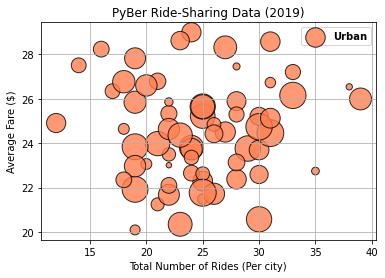

In [120]:
# create urban cities scatter plot
plt.scatter(urban_ride_count, urban_avg_fare, s=bigger_urban_markers, c='coral', alpha=.8, edgecolor='k', linewidths=1, label='Urban')
plt.xlabel('Total Number of Rides (Per city)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.legend(prop=dict(weight='bold'))
plt.grid(True)


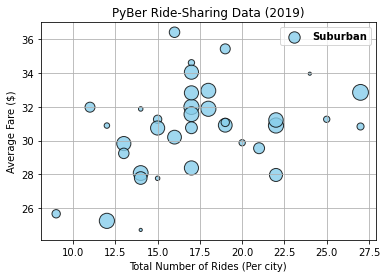

In [121]:
# Create Suburban Cities Bubble Chart
plt.scatter(suburban_ride_count, suburban_avg_fare, s=bigger_suburban_markers, c='skyblue', alpha=.8, linewidths=1, edgecolor='k', label='Suburban')
plt.xlabel('Total Number of Rides (Per city)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.legend(prop=dict(weight='bold'))
plt.grid(True)

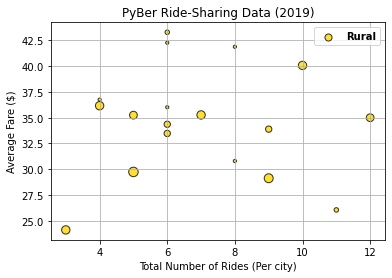

In [122]:
# Create Rural Cities Bubble Chart
plt.scatter(rural_ride_count, rural_avg_fare, s=bigger_rural_markers, c='gold', alpha=.8, linewidths=1, edgecolor='k', label='Rural')
plt.xlabel('Total Number of Rides (Per city)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.legend(prop=dict(weight='bold'))
plt.grid(True)

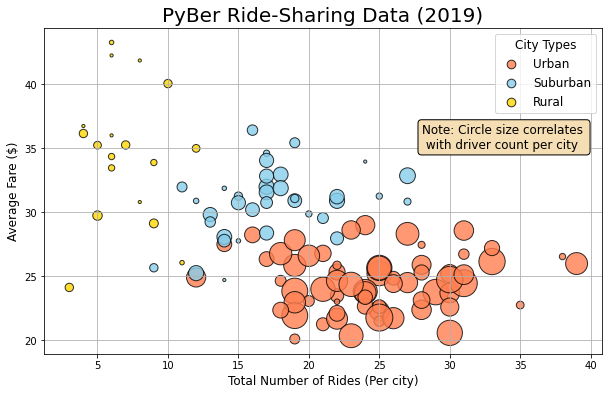

In [139]:
# merging the scatter plots
plt.figure(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, s=bigger_urban_markers, c='coral', alpha=.8, edgecolor='k', linewidths=1, label='Urban')
plt.scatter(suburban_ride_count, suburban_avg_fare, s=bigger_suburban_markers, c='skyblue', alpha=.8, linewidths=1, edgecolor='k', label='Suburban')
plt.scatter(rural_ride_count, rural_avg_fare, s=bigger_rural_markers, c='gold', alpha=.8, linewidths=1, edgecolor='k', label='Rural')
plt.xlabel('Total Number of Rides (Per city)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.legend(prop=dict(weight='bold'))
plt.grid(True)
# Format combined scatter plot legend
lgnd = plt.legend(fontsize=12, mode='Expanded', scatterpoints=1, loc='best', title='City Types',)
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# add text box to discuss circle size
box_format = dict(boxstyle='round', pad=0.3, fc='wheat', ec='k', lw=1)
plt.text(28, 35, 'Note: Circle size correlates \n with driver count per city', fontsize=12, bbox=box_format,)
# save the figure
plt.savefig('Analysis/Fig1.png')

In [141]:
# summary statistics on urban cities
urban_cities_df.describe()



,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [142]:
# summary statistics on suburban cities
suburban_cities_df.describe()


,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [143]:
# summary statistics on rural cities
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [181]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [146]:
# calculate the average ride count for each city type to two decimal places
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [147]:
# calculate the median number of rides
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [148]:
# calculate the mode number of rides
round(urban_ride_count.mode(), 2), round(suburban_ride_count.mode(), 2), round(rural_ride_count.mode(), 2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [154]:
# Summary Statistics for ride count for each city type
mean_urban_ride_count = np.mean(urban_ride_count)
median_urban_ride_count = np.median(urban_ride_count)
mode_urban_ride_count = sts.mode(urban_ride_count)
mean_suburban_ride_count = np.mean(suburban_ride_count)
median_suburban_ride_count = np.median(suburban_ride_count)
mode_suburban_ride_count = sts.mode(suburban_ride_count)
mean_rural_ride_count = np.mean(rural_ride_count)
median_rural_ride_count = np.median(rural_ride_count)
mode_rural_ride_count = sts.mode(rural_ride_count)

In [160]:
# create city type series for average fare
urban_fares = urban_cities_df['fare']
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']


In [166]:
# Summary Statistics for fares for each city type
mean_urban_fares = np.mean(urban_fares)
median_urban_fares = np.median(urban_fares)
mode_urban_fares = sts.mode(urban_fares)
mean_suburban_fares = np.mean(suburban_fares)
median_suburban_fares = np.median(suburban_fares)
mode_suburban_fares = sts.mode(suburban_fares)
mean_rural_fares = np.mean(rural_fares)
median_rural_fares = np.median(rural_fares)
mode_rural_fares = sts.mode(rural_fares)

In [173]:
# Create city type series for driver counts
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']


In [174]:
# summary statistics for the driver counts
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.mean(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)
mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.mean(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.mean(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)


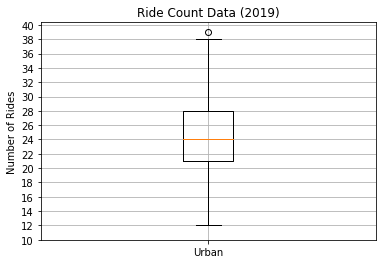

In [178]:
# Create a box and whisker plot for the urban cities ride count
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# add y axes label, title, and grid
ax.set_ylabel('Number of Rides')
ax.set_title('Ride Count Data (2019)')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid(True)


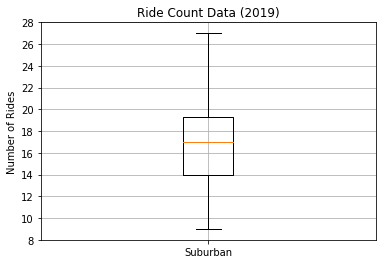

In [180]:
# Create a box and whisker plot for suburban ride counts
x_labels =  ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# add title, y axes label, yticks, and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(8, 30, step=2.0))
ax.grid()

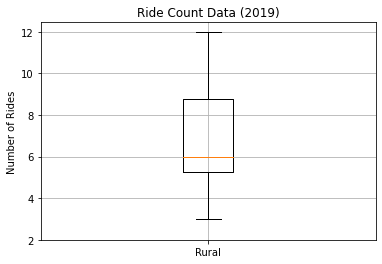

In [182]:
# Create a box and whisker plot for suburban ride counts
x_labels =  ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# add title, y axes label, yticks, and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(2, 14, step=2.0))
ax.grid()

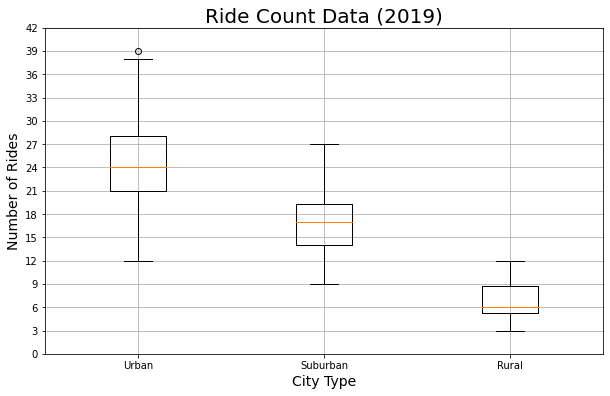

In [187]:
# Create a box and whisker of all the ride counts
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels=x_labels)
# create axes labels, title, add grid, set yticks
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_xlabel('City Type', fontsize=14)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
plt.savefig('Analysis/Fig2.png')
plt.show()

In [194]:
# Finding urban city with ride count outlier
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
urban_city_outlier

'West Angela'

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

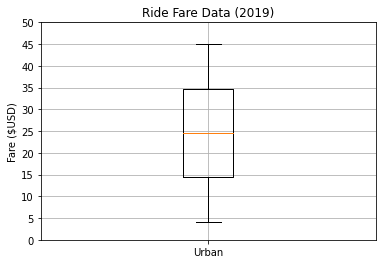

In [198]:
# Create Urban Fares Box Plot
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show
print('Summary Statistics')
urban_fares.describe()

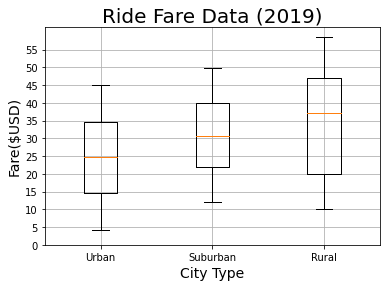

In [204]:
# Create a figure with box and whisker plots for all three city types based on ride fares
x_labels = ['Urban', 'Suburban', 'Rural']
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_xlabel('City Type', fontsize=14)
ax.set_ylabel('Fare($USD)', fontsize=14)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.savefig('Analysis/Fig3.png')

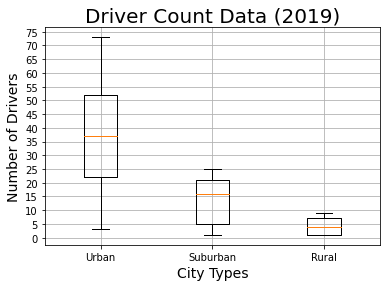

In [205]:
# Create Box and Whisker Plots for the Driver Count Data
x_labels = ['Urban', 'Suburban', 'Rural']
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0,80, step=5.0))
ax.grid()
plt.savefig